In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from efficientnet_pytorch import EfficientNet
from torch.utils.tensorboard import SummaryWriter

In [101]:
# Assuming you have a dataset in the 'data' directory with train and val subdirectories.
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

train_dataset = datasets.ImageFolder('flower/Train', transform=data_transforms['train'])
val_dataset = datasets.ImageFolder('flower/Test', transform=data_transforms['val'])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [102]:
len(train_dataset)

4131

In [103]:
len(val_dataset)

186

In [104]:
import torch.utils.data as data
from torch.autograd import Variable
import numpy as np

print("Number of train samples: ", len(train_dataset))
print("Number of test samples: ", len(val_dataset))
#print("Number of validation samples: ", len(validation_data))
#print("Detected Classes are: ", train_ds.class_to_idx)

Number of train samples:  4131
Number of test samples:  186


In [105]:
class CustomEfficientNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomEfficientNet, self).__init__()
        self.effnet = EfficientNet.from_pretrained('efficientnet-b0')
        num_ftrs = self.effnet._fc.in_features
        self.effnet._fc = nn.Linear(num_ftrs, num_classes)
        self.activation_layer = None
    
    def forward(self, x):
        x = self.effnet.extract_features(x)
        # Store the output of the desired activation layer
        x.register_hook(self.save_activation_gradient)
        self.activation_layer = x
        x = self.effnet._avg_pooling(x)
        x = x.view(x.size(0), -1)
        x = self.effnet._dropout(x)
        x = self.effnet._fc(x)
        return x
    
    def save_activation_gradient(self, grad):
        self.activations = grad
        
# Number of classes in your dataset
num_classes = len(train_dataset.classes)

# Load the model and set up other necessary components
#odel = CustomEfficientNet(num_classes)
#odel.load_state_dict(torch.load(saved_model_path))
#odel = model.to(device)
#odel.eval()

# Assuming you have a sample image tensor 'image_tensor'
# Preprocess the image and obtain the activation layer output
#mage_tensor = preprocess_image('path_to_your_image.jpg')
#mage_tensor = image_tensor.to(device)
#utput = model(image_tensor)
#ctivation_layer = model.activation_layer

In [106]:
#import cv2
#import numpy as np

#def grad_cam(model, activation_layer, image, device):
    # Set the model to evaluation mode
#    model.eval()
    
    # Forward pass
#    output = model(image)
#    _, predicted_class = torch.max(output, 1)
    
    # Get the output of the specified activation layer
#    activation = activation_layer.activations.detach().cpu().numpy()[0]
#    weights = model.fc.weight[predicted_class].detach().cpu().numpy()
    
    # Calculate the Grad-CAM heatmap
#    grad_cam = np.zeros(activation.shape[1:], dtype=np.float32)
#    for i, w in enumerate(weights):
#        grad_cam += w * activation[i, :, :]
    
#    grad_cam = np.maximum(grad_cam, 0)  # ReLU operation
#   grad_cam /= np.max(grad_cam)  # Normalize
    
    # Resize the Grad-CAM heatmap to match the original image size
#    heatmap = cv2.resize(grad_cam, (image.shape[3], image.shape[2]))
    
#    return heatmap

In [107]:
#model.load_state_dict(torch.load(saved_model_path))
#model = model.to(device)
#model.eval()

# Assuming you have a sample image tensor 'image_tensor'
# Preprocess the image and obtain the activation layer output
#image_tensor = preprocess_image('path_to_your_image.jpg')
#image_tensor = image_tensor.to(device)
#output = model(image_tensor)
#activation_layer = model.activation_layer

In [108]:
class CustomEfficientNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomEfficientNet, self).__init__()
        self.effnet = EfficientNet.from_pretrained('efficientnet-b0')
        num_ftrs = self.effnet._fc.in_features
        self.effnet._fc = nn.Linear(num_ftrs, num_classes)
         # Change this to use a specific block (e.g., block 2)
        self.layer = nn.Sequential(*list(self.effnet.children())[:2])

    def forward(self, x):
        return self.effnet(x)
        

#Number of classes in your dataset
num_classes = len(train_dataset.classes)

# Create an instance of the custom model
model = CustomEfficientNet(num_classes)

Loaded pretrained weights for efficientnet-b0


In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

CustomEfficientNet(
  (effnet): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSameP

In [110]:
writer = SummaryWriter()

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item()

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Training Loss: {running_loss/len(train_loader):.4f}, '
          f'Validation Loss: {val_loss/len(val_loader):.4f}, '
          f'Validation Accuracy: {(correct/total)*100:.2f}%')
    
    # Log training loss
    writer.add_scalar('Training Loss', running_loss / len(train_loader), epoch)

    # Log validation loss and accuracy
    writer.add_scalar('Validation Loss', val_loss / len(val_loader), epoch)
    writer.add_scalar('Validation Accuracy', (correct / total) * 100, epoch)

# Close the SummaryWriter
writer.close()
print('Training finished!')

Epoch 1/2, Training Loss: 0.5166, Validation Loss: 0.3645, Validation Accuracy: 86.56%
Epoch 2/2, Training Loss: 0.3453, Validation Loss: 0.3950, Validation Accuracy: 88.17%
Training finished!


In [111]:
#PATH = "state_dict_model.pt"

# Save
#torch.save(model.state_dict(), PATH)

In [112]:
# Save the model to a file
model_path = 'Efnet/efficientnet_finetuned.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')

Model saved to Efnet/efficientnet_finetuned.pth


In [113]:
# Save the entire model
#model_path = 'Efnet1/model.pth'
#torch.save(model, model_path)
#print(f'Model saved to {model_path}')

In [114]:
#revalidating model on new test data
test_dataset = datasets.ImageFolder('flower/Test', transform=data_transforms['val'])
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [115]:
from torchsummary import summary

# Load the saved model checkpoint
#saved_model_path = 'efficientnet_finetuned.pth'
#model = CustomEfficientNet(num_classes)  # Assuming you defined CustomEfficientNet as before
#model.load_state_dict(torch.load(saved_model_path))
#model.to(device)


# Generate a summary of the model
#summary(model, (3, 224, 224))  # Assuming input size is (3, 224, 224)



def evaluate_model(model, dataloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss += criterion(outputs, labels).item()

    accuracy = (correct / total) * 100
    average_test_loss = test_loss / len(dataloader)

    return accuracy, average_test_loss



In [116]:
# Load the saved model checkpoint
saved_model_path = 'Efnet/efficientnet_finetuned.pth'
model = CustomEfficientNet(num_classes)  # Assuming you defined CustomEfficientNet as before
model.load_state_dict(torch.load(saved_model_path))
model.to(device)
model.eval()

Loaded pretrained weights for efficientnet-b0


CustomEfficientNet(
  (effnet): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSameP

In [117]:
# Generate a summary of the model
#summary(model, (3, 224, 224))  # Assuming input size is (3, 224, 224)
summary(model, (3, 224, 224))  # Assuming input size is (3, 224, 224)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 225, 225]               0
         ZeroPad2d-2          [-1, 3, 225, 225]               0
Conv2dStaticSamePadding-3         [-1, 32, 112, 112]             864
Conv2dStaticSamePadding-4         [-1, 32, 112, 112]             864
       BatchNorm2d-5         [-1, 32, 112, 112]              64
       BatchNorm2d-6         [-1, 32, 112, 112]              64
MemoryEfficientSwish-7         [-1, 32, 112, 112]               0
         ZeroPad2d-8         [-1, 32, 114, 114]               0
Conv2dStaticSamePadding-9         [-1, 32, 112, 112]             288
      BatchNorm2d-10         [-1, 32, 112, 112]              64
MemoryEfficientSwish-11         [-1, 32, 112, 112]               0
         Identity-12             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-13              [-1, 8, 1, 1]             264
MemoryEfficie

In [118]:
import torch
from torchviz import make_dot

# Create a dummy input tensor
#dummy_input = torch.randn(1,3, 224, 224)  # Assuming input size is (3, 224, 224)

# Generate a computation graph visualization
#output = model(dummy_input)
#graph = make_dot(output, params=dict(model.named_parameters()))

# Save the computation graph as a PDF or display it
#graph.render('model_graph', format='pdf')  # Save as PDF
#graph.view()  # Display the graph using the default viewer

In [119]:
test_accuracy, test_loss = evaluate_model(model, test_loader, criterion)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.3932
Test Accuracy: 88.17%


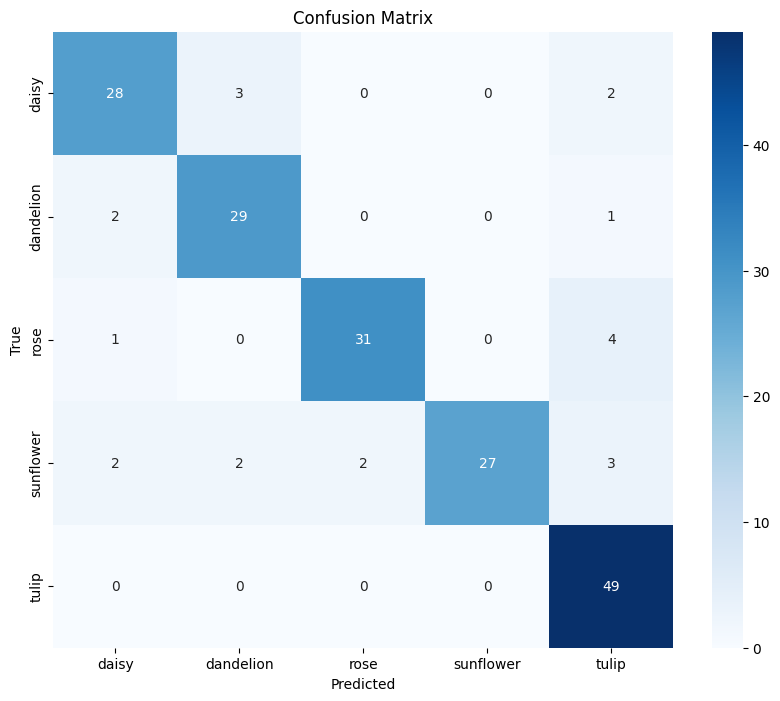

In [120]:
# ... Previous code to preprocess the test data and load the model ...

# Evaluate the model on the test data
def evaluate_model(model, dataloader):
    model.eval()
    all_predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return all_predictions, true_labels

# Evaluate the model
predictions, true_labels = evaluate_model(model, test_loader)


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Define class labels (assuming you have access to the class names)
class_labels = train_dataset.classes

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [121]:
#For infereccing on single image 

from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = data_transforms['val'](image)
    image = image.unsqueeze(0)  # Add a batch dimension
    return image


# Display the test image
def display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

image_path = 'flower/Test/sunflower/23356825566_f5885875f2.jpg'  # Replace with the actual image path
preprocessed_image = preprocess_image(image_path)

Loaded pretrained weights for efficientnet-b0
Test Image:


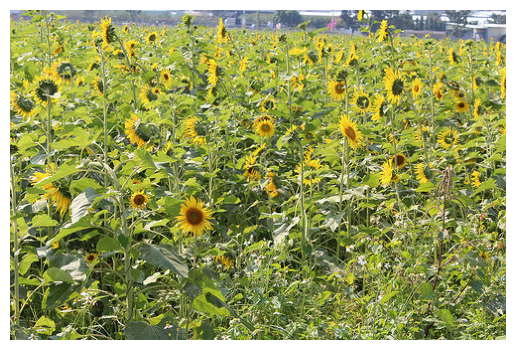

Predicted class: dandelion
Predicted probability: 0.5224


In [123]:
# Load the saved model checkpoint
saved_model_path = 'Efnet/efficientnet_finetuned.pth'
model = CustomEfficientNet(num_classes)  # Assuming you defined CustomEfficientNet as before
model.load_state_dict(torch.load(saved_model_path))
model.to(device)
model.eval()  # Set the model to evaluation mode

# Predict the image
with torch.no_grad():
    preprocessed_image = preprocessed_image.to(device)
    output = model(preprocessed_image)
    probabilities = torch.softmax(output, dim=1)

# Get the predicted class label and probability
predicted_class = torch.argmax(output, dim=1).item()
predicted_probability = probabilities[0][predicted_class].item()

# Display the test image
print('Test Image:')
display_image(image_path)

# Get the class label
class_labels = train_dataset.classes  # Assuming train_dataset is available
predicted_label = class_labels[predicted_class]

print(f'Predicted class: {predicted_label}')
print(f'Predicted probability: {predicted_probability:.4f}')

In [124]:
import sys
sys.path.append('/')

import cv2
import numpy as np
from torchvision import models
from efficientnet_pytorch import EfficientNet
from grad_cam import GradCam,GuidedBackpropReLUModel,show_cams,show_gbs,preprocess_image

In [125]:
loaded_model = CustomEfficientNet(num_classes=2)  # Assuming 'SkinCancerClassifier' is your model class
loaded_model.load_state_dict(torch.load(model_state_dict_path))
loaded_model.eval()  # Set the model to evaluation mode

Loaded pretrained weights for efficientnet-b0


NameError: name 'model_state_dict_path' is not defined

In [126]:
checkpoint_path = 'Efnet/efficientnet_finetuned.pth'
checkpoint = torch.load(checkpoint_path)
model = CustomEfficientNet(num_classes)


Loaded pretrained weights for efficientnet-b0


In [127]:
import cv2
import numpy as np

# Assuming you have defined CustomEfficientNet, GradCam, preprocess_image, show_cams, and show_gbs functions/classes

# 2. Instantiate the CustomEfficientNet Model
#num_classes =   # Specify the number of classes for your custom model
#model = CustomEfficientNet(num_classes)

In [135]:
# 3. Load the Model Checkpoint
#checkpoint_path = 'Efnet/efficientnet_finetuned.pth'
checkpoint_path_1 = 'state_dict_model.pt'
checkpoint = torch.load(checkpoint_path_1)
model = CustomEfficientNet(num_classes)  # Assuming you defined CustomEfficientNet as before
model.load_state_dict(torch.load(checkpoint)
#model.to(device)
#model.eval()

SyntaxError: unexpected EOF while parsing (1182156374.py, line 8)

In [136]:
# 3. Load the Model Checkpoint
#checkpoint_path = 'Efnet/efficientnet_finetuned.pth'
#checkpoint = torch.load(checkpoint_path)
#model = EfficientNet.from_pretrained('efficientnet-b0')
model = CustomEfficientNet(num_classes)
grad_cam = GradCam(model=model, blob_name = '_blocks', target_layer_names=['1','10','15'], use_cuda=False)
img = cv2.imread('flower/Test/rose/19823402005_2db025dd66_m.jpg', 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inputs = preprocess_image(img)
print(inputs.shape)

Loaded pretrained weights for efficientnet-b0
torch.Size([1, 3, 224, 224])


In [137]:
# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested index.
target_index = None
mask_dic = grad_cam(inputs, target_index)
show_cams(img, mask_dic)
gb_model = GuidedBackpropReLUModel(model=model, activation_layer_name = 'MemoryEfficientSwish', use_cuda=False)
show_gbs(inputs, gb_model, target_index, mask_dic)
model.load_state_dict(checkpoint)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [2, 6]

In [47]:
# 5. Initialize GradCAM
grad_cam = GradCam(model=model, blob_name='_blocks', target_layer_names=['1', '10', '18'], use_cuda=False)

In [33]:
# 6. Load and Preprocess the Image
img = cv2.imread('flower/Test/rose/19919867648_043cf02fc3.jpg', 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inputs = preprocess_image(img)

In [34]:
# 7. Generate GradCAM Masks
target_index = None
mask_dic = grad_cam(inputs, target_index)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [2, 6]

In [24]:
#model = EfficientNet.from_pretrained('efficientnet-b0')
model = CustomEfficientNet(num_classes)
model.eval() 
grad_cam = GradCam(model=model, blob_name = '_blocks', target_layer_names=['1','10','18'], use_cuda=False)
img = cv2.imread('flower/Test/rose/19919867648_043cf02fc3.jpg', 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inputs = preprocess_image(img)
# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested index.
target_index = None
mask_dic = grad_cam(inputs, target_index)
show_cams(img, mask_dic)
gb_model = GuidedBackpropReLUModel(model=model, activation_layer_name = 'MemoryEfficientSwish', use_cuda=False)
show_gbs(inputs, gb_model, target_index, mask_dic)

Loaded pretrained weights for efficientnet-b0


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [2, 6]

In [20]:
#code not working 
import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import numpy as np
import cv2
import requests
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from PIL import Image

In [54]:
saved_model_path = 'Efnet/efficientnet_finetuned.pth'
model = CustomEfficientNet(num_classes)  # Assuming you defined CustomEfficientNet as before
model.load_state_dict(torch.load(saved_model_path))
model.to(device)
model.eval()  # Set the model to evaluation mode

#model = models.resnet50(pretrained=True)
#model.eval()

#img = 'flower/Test/sunflower/23356825566_f5885875f2.jpg'  # Replace with the actual image path
#preprocessed_image = preprocess_image(image_path)
#image_url = "https://th.bing.com/th/id/R.94b33a074b9ceeb27b1c7fba0f66db74?rik=wN27mvigyFlXGg&riu=http%3a%2f%2fimages5.fanpop.com%2fimage%2fphotos%2f31400000%2fBear-Wallpaper-bears-31446777-1600-1200.jpg&ehk=oD0JPpRVTZZ6yizZtGQtnsBGK2pAap2xv3sU3A4bIMc%3d&risl=&pid=ImgRaw&r=0"
#img = np.array(Image.open(requests.get(image_path, stream=True).raw))
#img = cv2.resize(img, (224, 224))
#img = np.float32(img) / 255
#input_tensor = preprocess_image(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

Loaded pretrained weights for efficientnet-b0


CustomEfficientNet(
  (effnet): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSameP

In [64]:
#Assuming you have preprocessed the image and obtained the preprocessed_image tensor
# Assuming you have defined preprocessed_image earlier
targets = [ClassifierOutputTarget(0)]  # Use a valid target index (0 to num_classes-1)

# Create an instance of the CustomEfficientNet model
#custom_model = CustomEfficientNet(num_classes)

#Use a specific layer (change this to the desired layer)
target_layers = [custom_model.layer]  # Assuming you want to use the layer attribute of CustomEfficientNet

In [70]:
targets = [ClassifierOutputTarget(0)]  # Use a valid target index (0 to num_classes-1)

# Create an instance of the CustomEfficientNet model
#custom_model = CustomEfficientNet(num_classes)

#Use a specific layer (change this to the desired layer)
target_layers = [custom_model.layer]  # Assuming you want to use the layer attribute of CustomEfficientNet
#grayscale_cam = grayscale_cam[0, :]


# Assuming you have defined preprocessed_image earlier
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=preprocessed_image, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)

cam = np.uint8(255 * grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])

images = np.hstack((np.uint8(255 * img), cam, cam_image))

Image.fromarray(images)

An exception occurred in CAM with block: <class 'numpy.AxisError'>. Message: axis 2 is out of bounds for array of dimension 0


NameError: name 'grayscale_cams' is not defined

In [67]:
# Create an instance of the CustomEfficientNet model
#custom_model = CustomEfficientNet(num_classes)

#Use a specific layer (change this to the desired layer)
#target_layers = [custom_model.layer]  # Assuming you want to use the layer attribute of CustomEfficientNet


targets = [ClassifierOutputTarget(295)]
#target_layers = [model.layer4]
#target_layers =[CustomEfficientNet]
target_layers = [custom_model.layer] 
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=preprocessed_image, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])
images = np.hstack((np.uint8(255*img), cam , cam_image))
Image.fromarray(images)

An exception occurred in CAM with block: <class 'IndexError'>. Message: index 295 is out of bounds for dimension 0 with size 5


NameError: name 'grayscale_cams' is not defined